# Heart fialure project :

### importing the libraries:

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore') 

### Reading the data :

In [4]:
dataset=pd.read_csv(r"D:\OMAR\9th term\selected topics\ML Project\heart_failure_clinical_records_dataset.csv")

In [5]:
dataset.shape

(299, 13)

In [6]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Exploring the data : EDA

In [7]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
dataset.isnull().sum()
#there is no missing values in our data

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
dataset.info()
#our data contains float and int types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


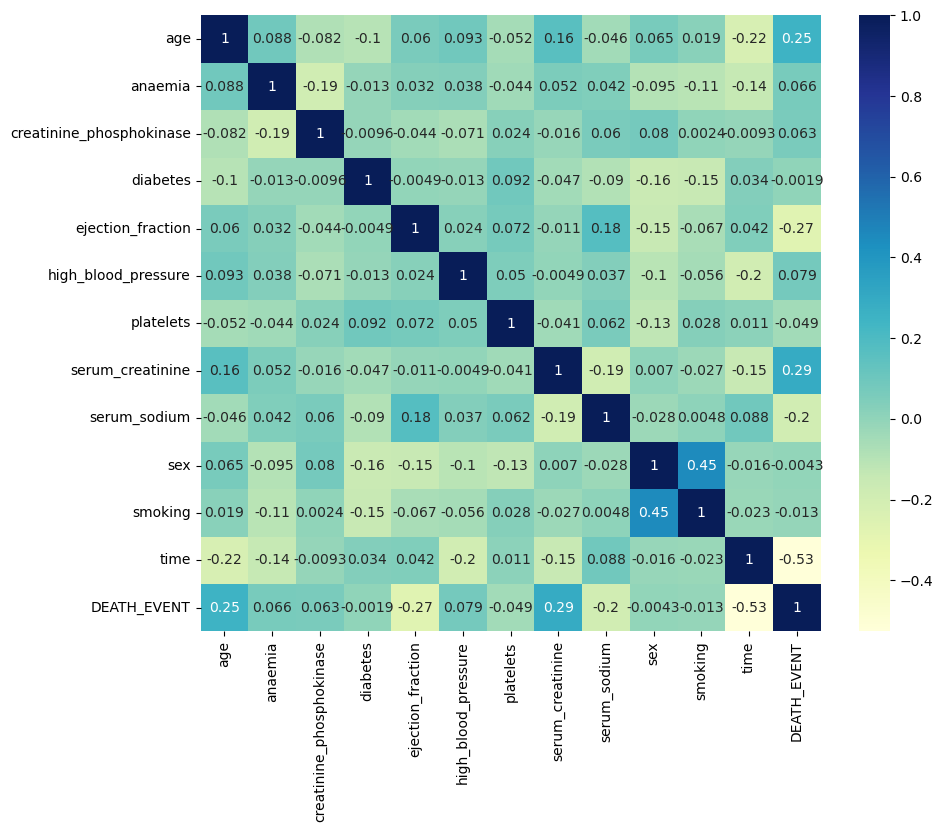

In [10]:
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
#here we show the correlations between every columns with our target("death event")

[Text(0, 0, '203'), Text(0, 0, '96')]

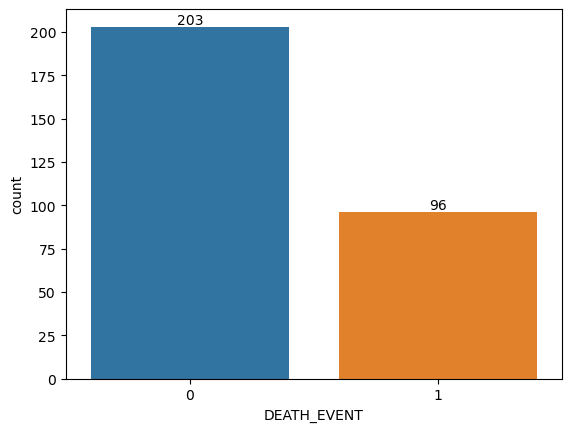

In [11]:
ax = sns.countplot(x= dataset["DEATH_EVENT"])
ax.bar_label(ax.containers[0])
#here we check the imbalanced data
#and here we noticed that target labels are 203 but 96 thus there is an imbalance in the data

### checking the outliers:

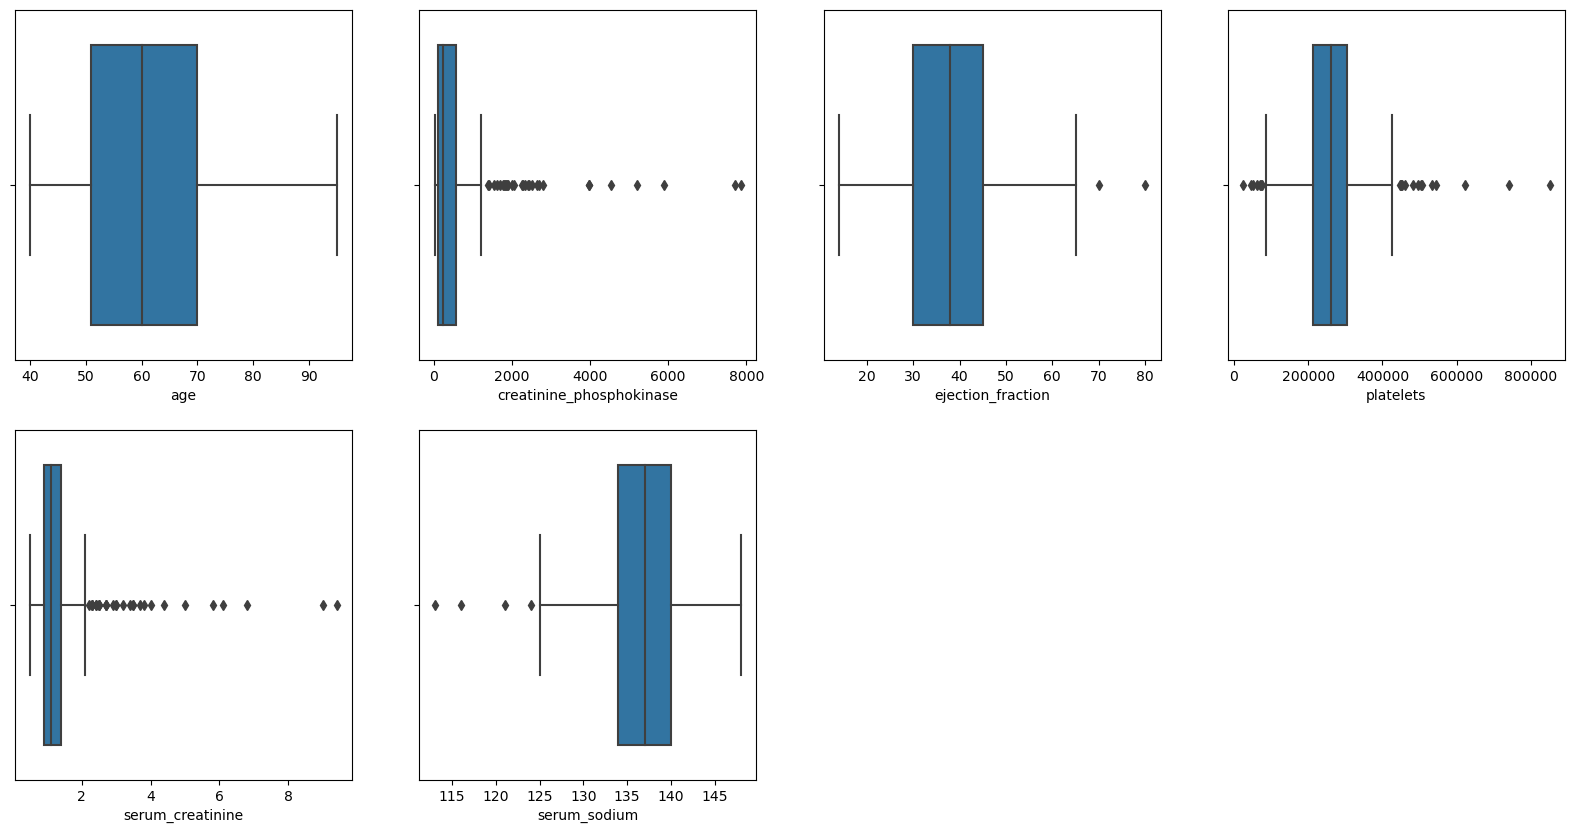

In [12]:
outliers = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

fig = plt.figure(figsize=(20,10))
j=1
for i in outliers:
    plt.subplot(2,4,j)
    sns.boxplot(dataset[i])
    j=j+1

In [13]:
outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

dataset1 = dataset.copy()
for i in outliers:
    q1 = dataset[i].quantile(0.25)                           
    q3 = dataset[i].quantile(0.75)
    
    iqr  = q3 - q1
    mini = q1 - 1.5* iqr
    maxi = q3 + 1.5*iqr
    

    dataset1[i] = np.where(
    dataset1[i] > maxi,
    maxi,
    np.where(
        dataset1[i] < mini,
        mini,
        dataset1[i]
        )
    )

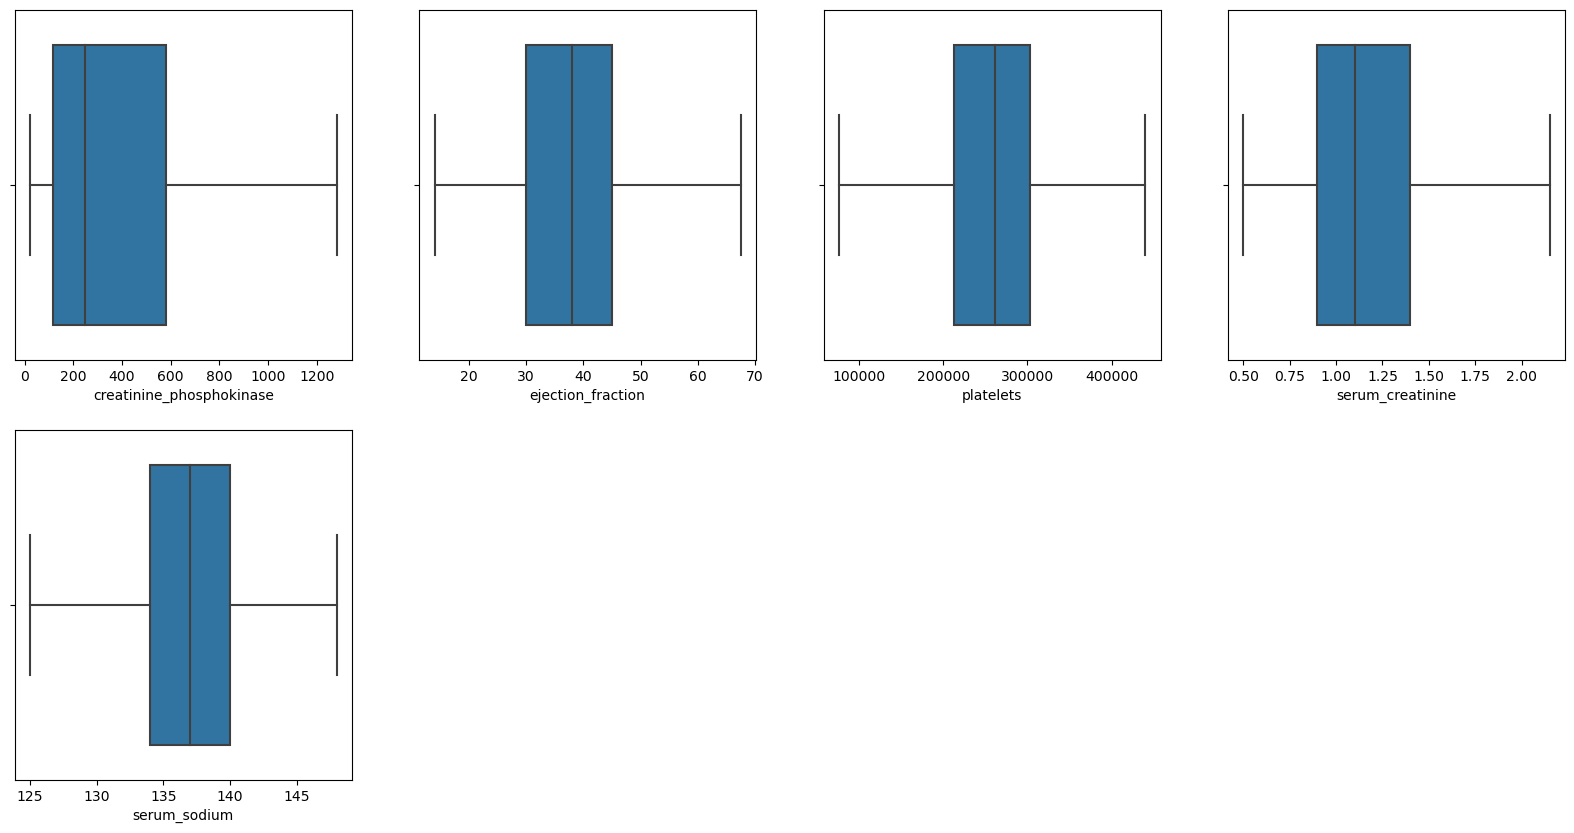

In [14]:
fig = plt.figure(figsize=(20,10))
j=1
for i in outliers:
    plt.subplot(2,4,j)
    sns.boxplot(dataset1[i])
    j=j+1

In [15]:
#here we have now no outliers so our data is clean and clear 

### Dealing with every coulumns to exploration :

Text(0.5, 1.0, 'age')

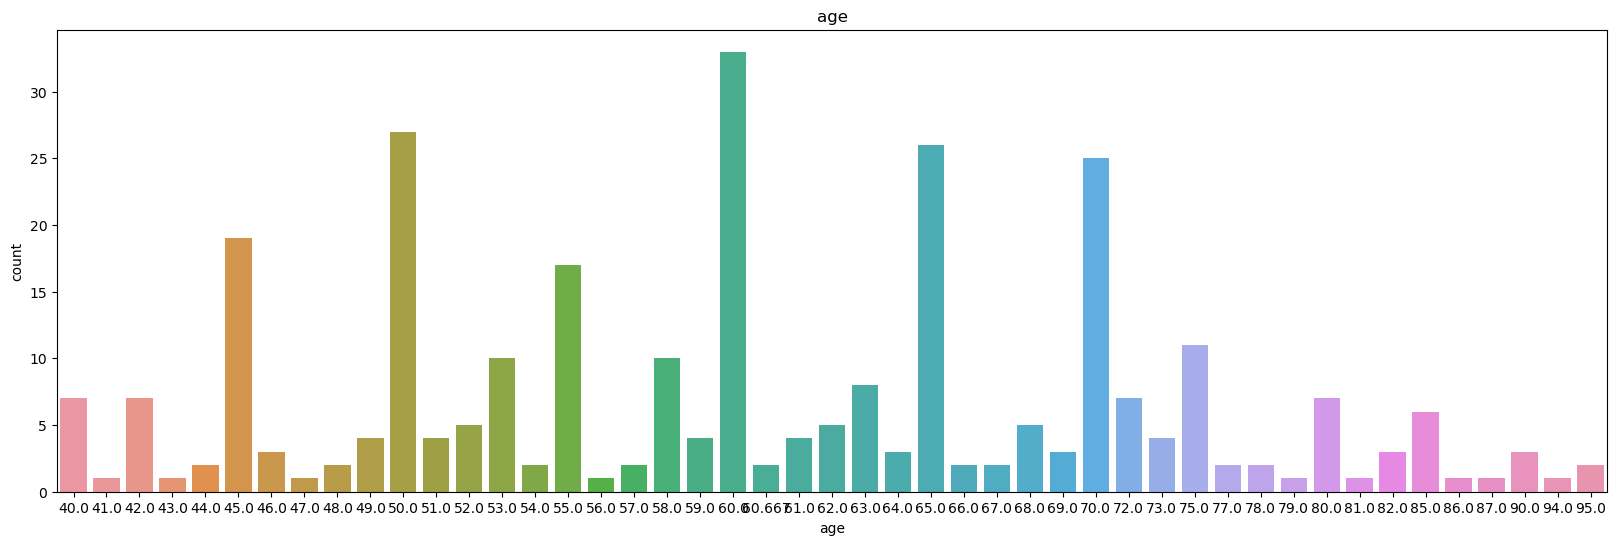

In [16]:
#for age :
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=dataset)
plt.title('age')

In [17]:
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

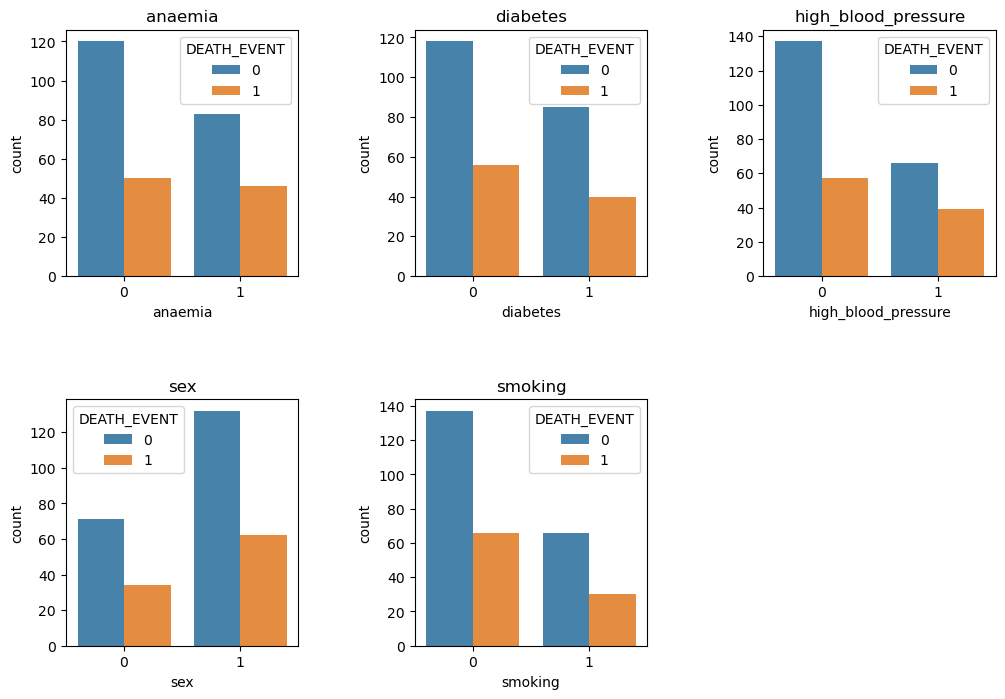

In [18]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.5)
    sns.countplot(data=dataset, x=col, hue="DEATH_EVENT", alpha=0.9, linewidth=1)

### preprocessing:


In [19]:
X=dataset1.drop(["DEATH_EVENT"],axis=1)
y=dataset1["DEATH_EVENT"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12 , stratify = (y))
col_names = list(X.columns)
print(X_train.shape)
print(X_test.shape)

(239, 12)
(60, 12)


### Feature Scaling:


In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_dataset1 = pd.DataFrame(X_train, columns=col_names) 

In [23]:
X_dataset1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.379664,-0.855502,-0.858992,1.209925,1.105036,1.396645,-0.848788,-0.539106,0.810339,0.696040,-0.689426,-1.267951
1,0.809845,-0.855502,-0.496910,-0.826498,-0.663910,-0.716002,-1.030301,-0.102487,-1.150886,0.696040,-0.689426,1.041535
2,-0.050518,1.168904,0.487008,-0.826498,0.220563,-0.716002,-0.509963,-1.412344,0.320032,0.696040,1.450481,-0.948961
3,-0.824845,-0.855502,2.253468,-0.826498,-1.106146,1.396645,0.155586,-0.757415,-1.641192,0.696040,-0.689426,-1.153115
4,2.100390,-0.855502,-1.045280,-0.826498,0.662800,-0.716002,1.232564,1.971454,-1.150886,0.696040,-0.689426,-1.280711
...,...,...,...,...,...,...,...,...,...,...,...,...
234,-1.341063,1.168904,2.253468,1.209925,-0.221673,-0.716002,-0.388954,-0.757415,0.320032,0.696040,-0.689426,-0.515135
235,1.067954,1.168904,-0.499534,1.209925,-0.663910,-0.716002,-1.187612,-0.146149,1.300645,0.696040,1.450481,0.658747
236,1.670208,-0.855502,0.930426,1.209925,0.043669,1.396645,-0.800384,0.115823,-0.415427,-1.436698,-0.689426,0.020768
237,-1.341063,1.168904,1.468301,-0.826498,-0.663910,-0.716002,-1.478033,-0.320796,0.074879,0.696040,-0.689426,-1.497624


# Modeling :

### 1- logistic regression:

In [27]:
#import GS
from sklearn.model_selection import GridSearchCV
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 

In [28]:
logreg = LogisticRegression()

In [29]:
# Create the parameter space
parameters = {"penalty": ["l1", "l2", "elastic_net"],
    "C": np.linspace(0.001,1, 20)}

In [30]:
# Instantiate the grid search object
GS = GridSearchCV(logreg, param_grid=parameters)
# Fit to the training data
GS.fit(X_train,y_train)
print(GS.best_score_, "\n", GS.best_params_)

0.8075354609929077 
 {'C': 0.5793684210526315, 'penalty': 'l2'}


In [31]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
#predict the data
y_pred = GS.predict(X_test)
# Predict probabilities
y_pred_probs = GS.predict_proba(X_test)[:,1]#probability of death 
print('probabilities:\n {}'.format(y_pred_probs[:10]))
#1 = death event , 0 = no death event  
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

probabilities:
 [0.01614528 0.63443968 0.1157439  0.068383   0.53668684 0.21731894
 0.17202672 0.02179776 0.66599155 0.13227021]
[[40  1]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.93      0.74      0.82        19

    accuracy                           0.90        60
   macro avg       0.91      0.86      0.88        60
weighted avg       0.90      0.90      0.90        60



roc score is :
 0.9306803594351732


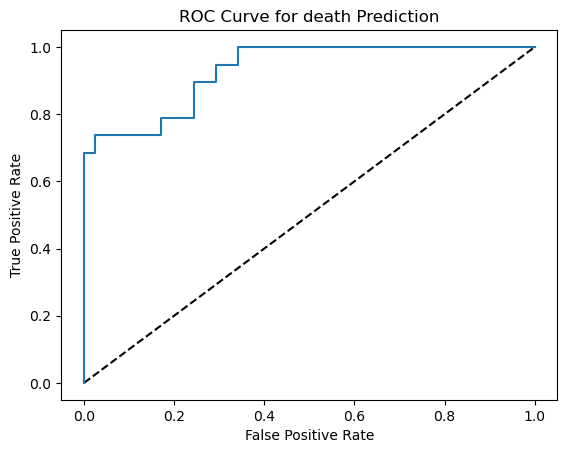

In [32]:
#calculate roc_auc_score
from sklearn.metrics import roc_auc_score
print('roc score is :\n {}'.format(roc_auc_score(y_test, y_pred_probs)))
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt  
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for death Prediction')
plt.show()

<AxesSubplot:>

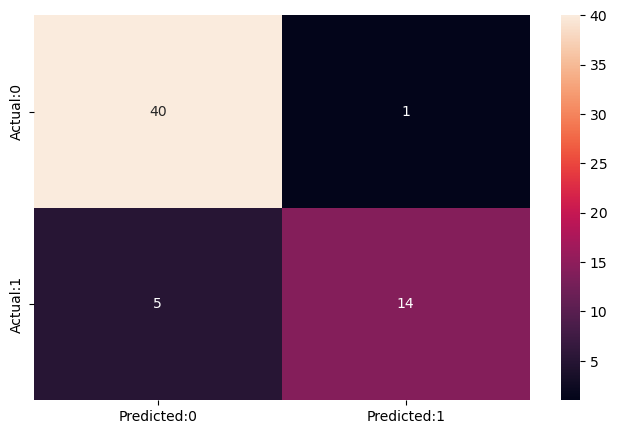

In [33]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [34]:
logregAcc = GS.score(X_test , y_test)
print(logregAcc)

0.9


### KNN model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
#cv
from sklearn.model_selection import cross_val_score , KFold
from sklearn.model_selection import GridSearchCV

In [36]:
#trying differrent knn for choosing best accuracy
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
 knn = KNeighborsClassifier(n_neighbors=neighbor)
 knn.fit(X_train, y_train)
 train_accuracies[neighbor] = knn.score(X_train, y_train)
 test_accuracies[neighbor] = knn.score(X_test, y_test)

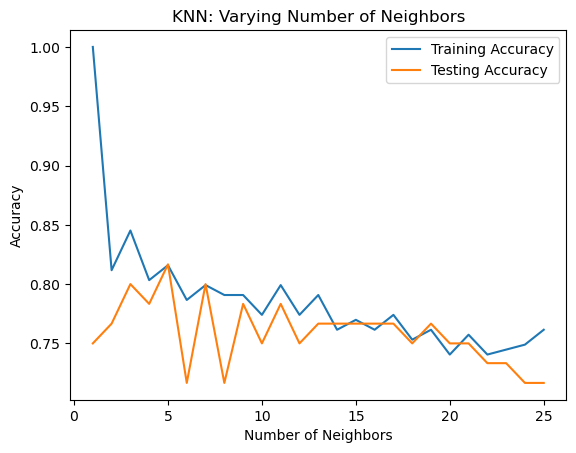

In [37]:
#plot
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [39]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [40]:
knn.score(X_test , y_test)

0.8166666666666667

In [41]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix , classification_report


In [42]:
#predict the data
y_pred = knn.predict(X_test)
# Predict probabilities
y_pred_probs = knn.predict_proba(X_test)[:,1]#probability of death 

print(y_pred_probs[:10])

#1 = death event , 0 = no death event  
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[0.  0.8 0.4 0.4 0.6 0.2 0.4 0.  0.6 0.2]
[[40  1]
 [10  9]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



In [43]:
#calculate roc_auc_score
from sklearn.metrics import roc_auc_score
print('roc score is :\n {}'.format(roc_auc_score(y_test, y_pred_probs)))

roc score is :
 0.8498074454428755


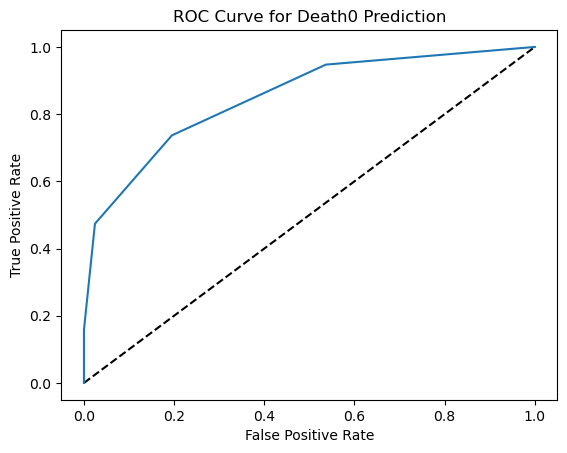

In [44]:
# Import roc_curve
from sklearn.metrics import roc_curve 
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Death0 Prediction')
plt.show()

<AxesSubplot:>

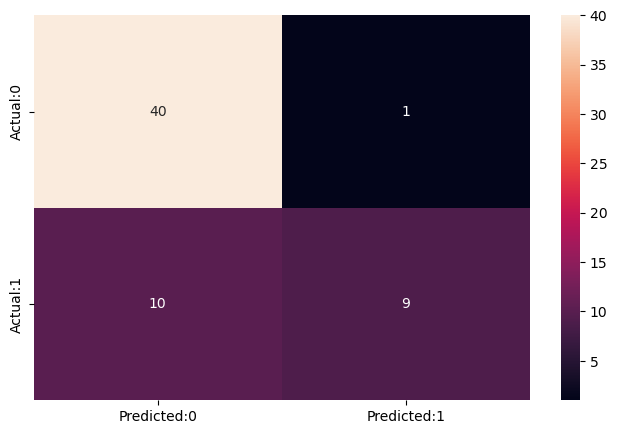

In [45]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [46]:
knnAcc  = knn.score(X_test , y_test)
print(knnAcc)

0.8166666666666667


# 4-support vector machine  :

In [55]:
from sklearn.model_selection import GridSearchCV
#Spiliting the data into the training_set & Test_set 
from sklearn.model_selection import train_test_split
# Feature scalling 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [56]:
# Create the parameter space
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
# Instantiate the grid search object
cv = GridSearchCV(SVC(probability=(True)), param_grid=parameters)

In [58]:
# Fit to the training data
cv.fit(X_train,y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8115248226950355 
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [59]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
#predict the data
y_pred = cv.predict(X_test)
# Predict probabilities
y_pred_probs = cv.predict_proba(X_test)[:,1]#probability of death 
print('probabilities:\n {}'.format(y_pred_probs[:10]))
#1 = death event , 0 = no death event  
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
#calculate roc_auc_score

probabilities:
 [0.03280569 0.69023426 0.14418511 0.13279705 0.77331287 0.20084747
 0.18434434 0.02537265 0.5        0.18576092]
[[41  0]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        41
           1       1.00      0.74      0.85        19

    accuracy                           0.92        60
   macro avg       0.95      0.87      0.90        60
weighted avg       0.93      0.92      0.91        60



roc score is :
 0.9242618741976893


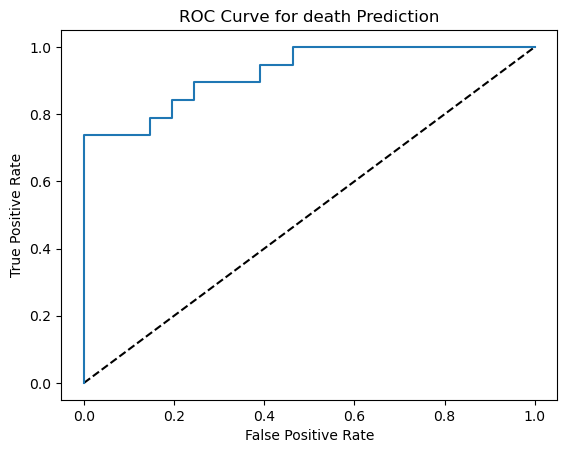

In [60]:
from sklearn.metrics import roc_auc_score
print('roc score is :\n {}'.format(roc_auc_score(y_test, y_pred_probs)))
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt  
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for death Prediction')
plt.show()

<AxesSubplot:>

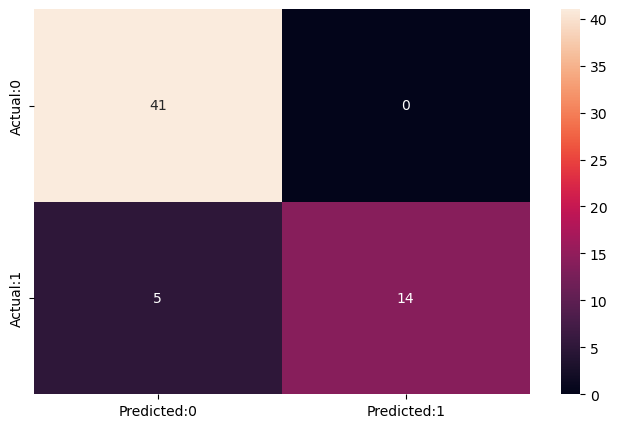

In [61]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, 
            annot=True,fmt='d')

In [62]:
svmAcc = cv.score(X_test , y_test)
print(svmAcc)

0.9166666666666666


# 3-Decision tree model :

In [75]:
from sklearn import tree
# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [76]:
y_pred = clf.predict(X_test)

In [77]:
clfAcc = accuracy_score(y_test,y_pred)
clfAcc

0.8166666666666667

<AxesSubplot:>

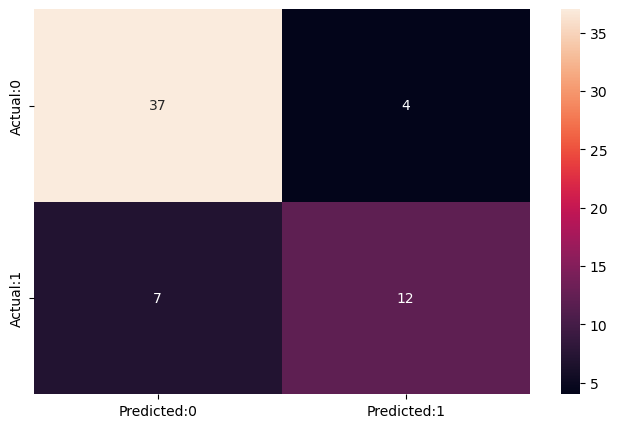

In [78]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

###  5-Random forest model :

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(max_features=7 ,max_depth=3 ,random_state=0)

In [89]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

0.899581589958159

In [90]:
y_pred = rf.predict(X_test)

In [91]:
rf.score(X_test , y_test)

0.8833333333333333

In [92]:
rfAcc = accuracy_score(y_test,y_pred)
rfAcc

0.8833333333333333

<AxesSubplot:>

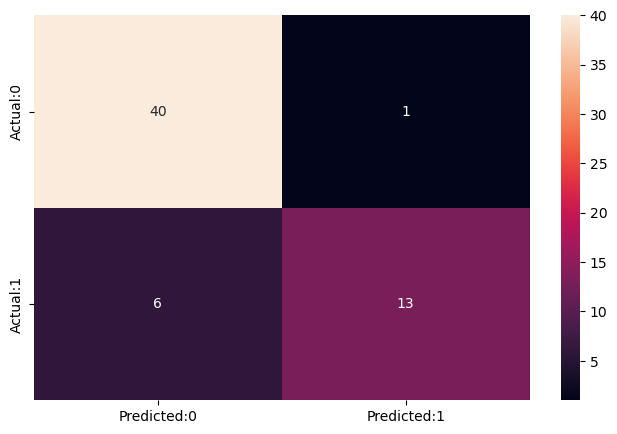

In [93]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [94]:
data={'Estimators':[ 'RandomForest','Logistic Regression','K-Nearest Neighbor', 'Decision Tree','Support Vector Machine'],
      'Accuracy':[rfAcc,logregAcc,knnAcc,clfAcc,svmAcc]}
data =pd.DataFrame(data)
data.sort_values('Accuracy', ascending=False)

,Estimators,Accuracy
4,Support Vector Machine,0.916667
1,Logistic Regression,0.900000
0,RandomForest,0.883333
2,K-Nearest Neighbor,0.816667
3,Decision Tree,0.816667


## Note :the best model here are SVM and Logistic Regression with accuracy 90%
